# KNN model

## Data understanding
### Import libraries - load dataset
To begin with, we import several libraries to work with KNN model. Each library handles different function, which could be briefly explain below:
+ pandas: For handling datasets (loading, manipulating, and analyzing data).
+ CategoricalDtype: Helps define categorical data types explicitly in Pandas.
+ IPython.display: Used for displaying formatted text (Markdown) in Jupyter Notebooks.
+ numpy: Provides numerical operations, including arrays and matrices.
+ train_test_split (from sklearn.model_selection): Splits the dataset into training and testing sets.
+ KNeighborsClassifier (from sklearn.neighbors): Implements the K-Nearest Neighbors (KNN) classifier.
+ confusion_matrix & ConfusionMatrixDisplay: Used to evaluate model performance by showing actual vs. predicted classifications.
+ seaborn: Used to visualize scatter plots

After importing required libraries, we then need to load the dataset. The dataset used for this KNN model is fake_bills.csv. We use KNN to classify bills in the "fake bills" dataset as genuine or fake by training the model on features like diagonal, height, and margins,...


In [3]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

rawDF = pd.read_csv("fake_bills.csv") #this is to load the dataset, which in this case is fake_bills. 
rawDF.info() #this is to print out some basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


### Visualize the dataset

A good way to have a better understanding about the dataset is to visualize it. To see the relationship between multiple variables, we can use scatter matrix plots. 

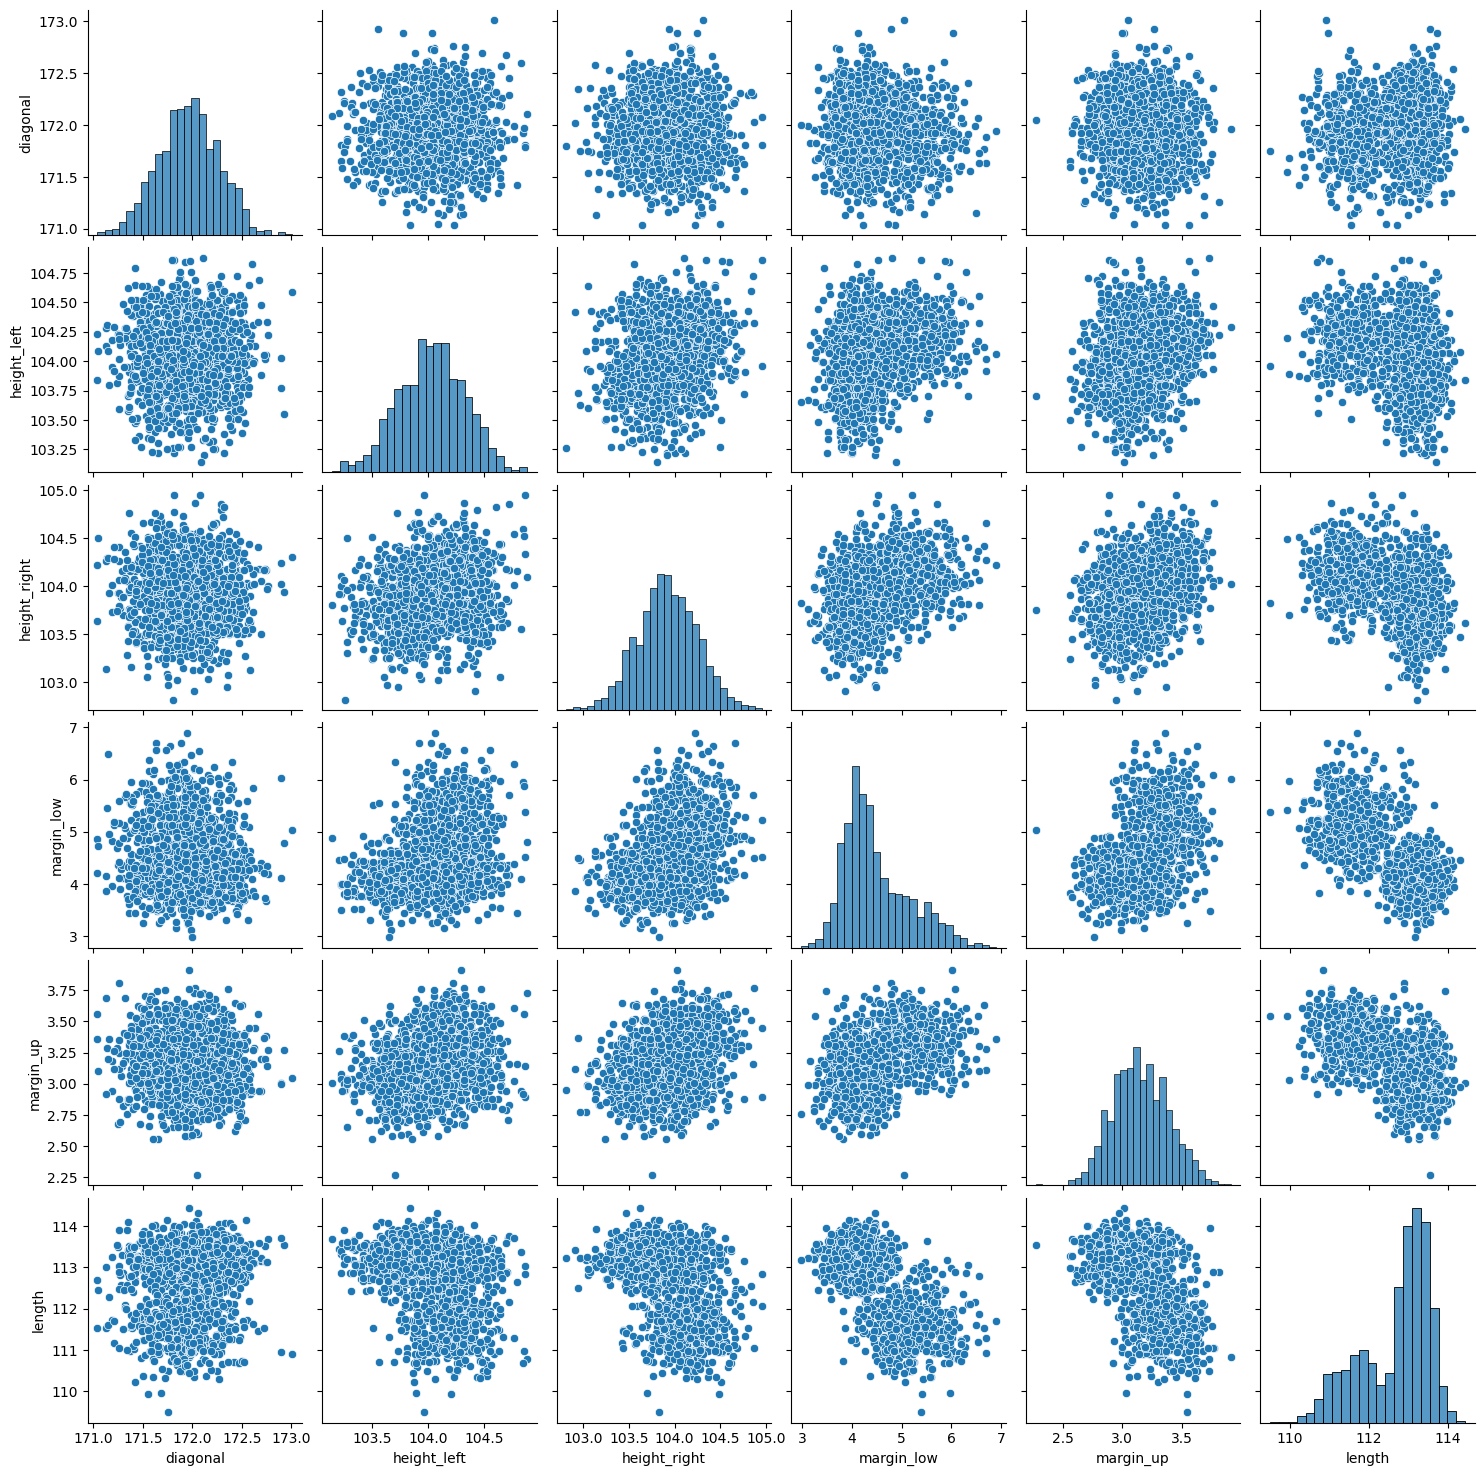

In [17]:
print(sn.pairplot(rawDF[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]])) #Plot a scatter matrix plot using seaborn library

## Preparation
### Clean the dataset

After loading the dataset, it is important to clean the dataset, as raw dataset may contains missing values, which we cannot use to train our model.

In [5]:
df_cleaned = rawDF.dropna() #this is to clean the dataset, in other words, to get rid of rows with missing values
df_cleaned.head() 

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
# We can first look for the counts of the variable we would like to predict, which in this case is "is_geniune" - if the bill is real or fake, which in this case is true or false

cntDiag = df_cleaned["is_genuine"].value_counts() # this is to count the number of true - false of the whole dataset (after cleaned)
propDiag = df_cleaned["is_genuine"].value_counts(normalize=True) # this is to get the proportion of the value counts
cntDiag

is_genuine
True     971
False    492
Name: count, dtype: int64

In [7]:
propDiag

is_genuine
True     0.663705
False    0.336295
Name: proportion, dtype: float64

### Normalization
As each variable differs from each other in terms of ranges, we need to apply normalization to rescale all features to a standard range of values. 

In [ ]:
#first, you function describe() to see the ranges of all variables.

df_cleaned[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


Normalization function: 

In [11]:
def normalize(x):
    return (x - min(x)) / (
        max(x) - min(x)
    )  # distance of item value - minimum vector value divided by the range of all vector values


testSet1 = np.arange(1, 6)
testSet2 = np.arange(1, 6) * 10


print(f"testSet1: {testSet1}\n")

testSet1: [1 2 3 4 5]



In [12]:
print(f"testSet2: {testSet2}\n")

testSet2: [10 20 30 40 50]



In [13]:
print(f"Normalized testSet1: {normalize(testSet1)}\n")

Normalized testSet1: [0.   0.25 0.5  0.75 1.  ]



In [14]:
print(f"Normalized testSet2: {normalize(testSet2)}\n")

Normalized testSet2: [0.   0.25 0.5  0.75 1.  ]



Then we apply this to numerical variables in the dataframe.

In [15]:

excluded = ["is_genuine"]  # list of columns to exclude
# X = cleanDF.loc[:, ~cleanDF.columns.isin(excluded)]
X = df_cleaned.drop(excluded, axis=1)
X = X.apply(normalize, axis=0)
X[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,0.466596,0.512260,0.495822,0.384175,0.538465,0.659370
std,0.155054,0.172187,0.158912,0.169340,0.141138,0.180791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360406,0.393678,0.392157,0.264031,0.439024,0.523810
50%,0.467005,0.517241,0.495098,0.339286,0.530488,0.718427
75%,0.573604,0.626437,0.607843,0.482143,0.637195,0.797101
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, after normalization, the ranges of all variables are now in the same scale, which means we can train our KNN model without encountering problems.

We can now split our data into training and test sets.

In [19]:
y = df_cleaned["is_genuine"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Modeling and Evaluation

In [20]:
knn = KNeighborsClassifier(n_neighbors=5) # We use function KNeighborsClassifier in sklearn library to call out KNN.
knn.fit(X_train.iloc[:,:15], y_train) #  The fit() function trains the model on the training data.
# # make predictions on the test set
y_pred = knn.predict((X_test.iloc[:,:15])) #predict() function uses the trained kNN model to make predictions on the test set and stores the predicted label.

Display our KNN tabel:

In [56]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[146,   2],
       [  0, 291]])

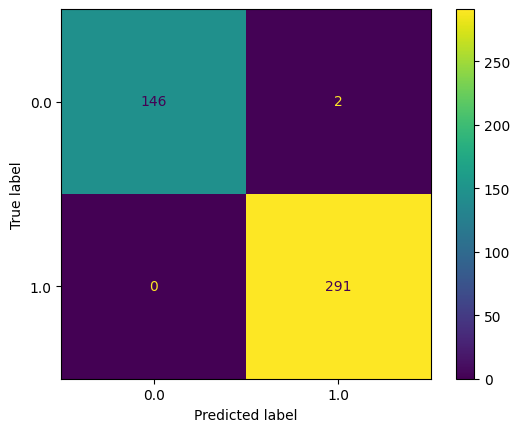

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

# 1 = True; 2 = false

### Check the accuracy score

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the kNN model: {accuracy:.4f} ({accuracy * 100:.2f}%)")

Accuracy of the kNN model: 0.9954 (99.54%)


### Conclusion

As we can see, with this dataset and some preparation steps, we have trained out KNN model with a 99.54% accuracy score, which is extremely high. It is advised to train this model multiple times with different "k" to jump to the final conclusion, but based on this one trial, we can use KNN to predict if the bill is fake or real for this dataset

# RANDOM FOREST

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [23]:
# Load the dataset
file_path = 'fake_bills.csv'  
data = pd.read_csv(file_path)

In [24]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before imputation:\n", missing_values)

Missing values before imputation:
 is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [25]:
# Impute missing values in 'margin_low' with the mean of the column
data['margin_low'].fillna(data['margin_low'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13580\141083567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['margin_low'].fillna(data['margin_low'].mean(), inplace=True)


In [26]:
# Check for missing values again after imputation
missing_values_after_imputation = data.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after_imputation)


Missing values after imputation:
 is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [27]:

# Define feature columns (X) and target variable (y)
X = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = data['is_genuine']

In [28]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [30]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9933333333333333
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



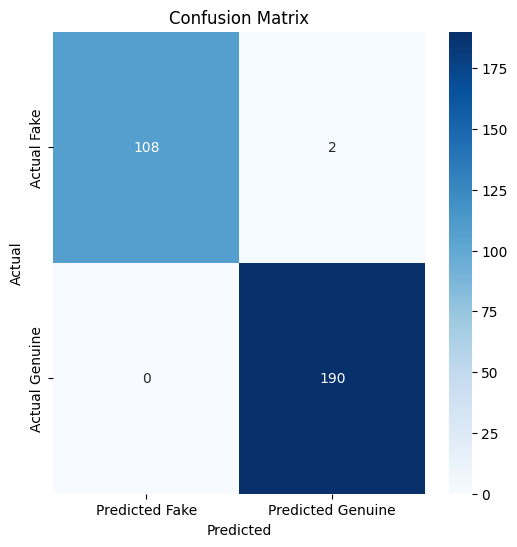

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Fake', 'Predicted Genuine'], yticklabels=['Actual Fake', 'Actual Genuine'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()